In [29]:
import pandas as pd

In [30]:
nyse = pd.read_excel('./data/Financial_Market/NYSE_closing_price.xlsx')

In [31]:
nyse.head() #preview

,Value,Date,Super Region,Ticker,Time Level,Source,Stock Name,Sub-Sector,Stock Attribute,Currency,Data Provider,Stock Exchange,Location
0,36.67,2020-08-07,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK
1,67.68,2018-03-07,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK
2,46.23,2021-01-25,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK
3,35.73,2020-08-06,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK
4,67.39,2018-03-06,GLOBAL DATA,MPC,DAILY,WORLDDATA.AI,MARATHON PETROLEUM CORPORATION,GLOBAL STOCK EXCHANGE DATA,CLOSING PRICE,USD,NEW YORK STOCK EXCHANGE,NEW YORK STOCK EXCHANGE - STOCK PRICES,AMERICA-NEW_YORK


In [9]:
companies = list(dict(nyse['Stock Name'].value_counts()).keys())

In [39]:
nyse_indiv = pd.DataFrame(nyse.groupby('Date')['Value'].mean())

In [41]:
nyse_indiv #preview

,Value
Date,
2017-02-28,81.32000
2017-03-01,98.12600
2017-03-02,83.16125
2017-03-03,83.36500
2017-03-06,83.44000
...,...
2021-02-19,59.51100
2021-02-22,61.64000
2021-02-23,63.05800


In [43]:
nyse[nyse['Stock Name']==companies[0]].groupby('Date')['Value'].mean()

Date
2017-03-01    79.37
2017-03-02    78.33
2017-03-03    78.34
2017-03-06    78.72
2017-03-07    77.48
              ...  
2021-02-19    82.31
2021-02-22    83.96
2021-02-23    85.53
2021-02-24    87.25
2021-02-25    84.64
Name: Value, Length: 1000, dtype: float64

In [44]:
for company in companies:
    #create new column for each company
    nyse_indiv[f'Value_{company}'] = nyse[nyse['Stock Name']==company].groupby('Date')['Value'].mean()    

In [45]:
nyse_indiv

,Value,Value_PHILLIPS 66,Value_BP P.L.C.,Value_VALERO ENERGY CORPORATION,Value_CHEVRON CORPORATION,Value_OCCIDENTAL PETROLEUM CORPORATION,Value_MARATHON OIL CORPORATION,Value_PIONEER NATURAL RESOURCES COMPANY,Value_CONOCOPHILLIPS,Value_EXXON MOBIL CORPORATION,Value_MARATHON PETROLEUM CORPORATION
Date,,,,,,,,,,,
2017-02-28,81.32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.32,NaN
2017-03-01,98.12600,79.37,NaN,68.48,NaN,66.24,NaN,193.52,NaN,83.02,NaN
2017-03-02,83.16125,78.33,NaN,66.45,113.36,65.50,16.14,191.17,NaN,83.30,51.04
2017-03-03,83.36500,78.34,NaN,66.08,113.55,64.86,16.18,194.18,NaN,82.46,51.27
2017-03-06,83.44000,78.72,NaN,66.44,113.17,64.73,16.47,194.01,NaN,82.83,51.15
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-19,59.51100,82.31,22.87,71.53,95.80,25.42,9.45,133.94,48.42,52.37,53.00
2021-02-22,61.64000,83.96,23.63,74.25,98.39,26.47,10.20,139.47,50.88,54.30,54.85
2021-02-23,63.05800,85.53,24.23,75.81,99.63,26.06,11.16,145.24,52.10,55.05,55.77


In [59]:
nyse_indiv.drop(columns='Value', inplace=True)

In [60]:
nyse_indiv

,Value_PHILLIPS 66,Value_BP P.L.C.,Value_VALERO ENERGY CORPORATION,Value_CHEVRON CORPORATION,Value_OCCIDENTAL PETROLEUM CORPORATION,Value_MARATHON OIL CORPORATION,Value_PIONEER NATURAL RESOURCES COMPANY,Value_CONOCOPHILLIPS,Value_EXXON MOBIL CORPORATION,Value_MARATHON PETROLEUM CORPORATION
Date,,,,,,,,,,
2017-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.32,NaN
2017-03-01,79.37,NaN,68.48,NaN,66.24,NaN,193.52,NaN,83.02,NaN
2017-03-02,78.33,NaN,66.45,113.36,65.50,16.14,191.17,NaN,83.30,51.04
2017-03-03,78.34,NaN,66.08,113.55,64.86,16.18,194.18,NaN,82.46,51.27
2017-03-06,78.72,NaN,66.44,113.17,64.73,16.47,194.01,NaN,82.83,51.15
...,...,...,...,...,...,...,...,...,...,...
2021-02-19,82.31,22.87,71.53,95.80,25.42,9.45,133.94,48.42,52.37,53.00
2021-02-22,83.96,23.63,74.25,98.39,26.47,10.20,139.47,50.88,54.30,54.85
2021-02-23,85.53,24.23,75.81,99.63,26.06,11.16,145.24,52.10,55.05,55.77


In [61]:
nyse_indiv.isnull().sum()

Value_PHILLIPS 66                          15
Value_BP P.L.C.                            15
Value_VALERO ENERGY CORPORATION            15
Value_CHEVRON CORPORATION                  15
Value_OCCIDENTAL PETROLEUM CORPORATION     15
Value_MARATHON OIL CORPORATION             15
Value_PIONEER NATURAL RESOURCES COMPANY    15
Value_CONOCOPHILLIPS                       15
Value_EXXON MOBIL CORPORATION              15
Value_MARATHON PETROLEUM CORPORATION       15
dtype: int64

In [63]:
nyse_indiv.dropna(inplace=True)

In [64]:
nyse_indiv

,Value_PHILLIPS 66,Value_BP P.L.C.,Value_VALERO ENERGY CORPORATION,Value_CHEVRON CORPORATION,Value_OCCIDENTAL PETROLEUM CORPORATION,Value_MARATHON OIL CORPORATION,Value_PIONEER NATURAL RESOURCES COMPANY,Value_CONOCOPHILLIPS,Value_EXXON MOBIL CORPORATION,Value_MARATHON PETROLEUM CORPORATION
Date,,,,,,,,,,
2017-03-21,78.60,34.24,67.15,108.04,63.36,15.05,182.30,45.18,81.83,49.26
2017-03-22,78.83,33.99,67.57,108.39,63.51,15.02,182.33,44.65,81.76,49.57
2017-03-23,78.48,34.06,67.10,107.87,63.04,14.68,181.55,44.48,81.86,49.30
2017-03-24,77.27,33.78,65.78,107.99,62.83,14.61,180.91,44.10,81.23,48.87
2017-03-27,77.25,33.75,66.23,106.28,62.87,14.75,180.40,44.29,81.25,48.83
...,...,...,...,...,...,...,...,...,...,...
2021-02-19,82.31,22.87,71.53,95.80,25.42,9.45,133.94,48.42,52.37,53.00
2021-02-22,83.96,23.63,74.25,98.39,26.47,10.20,139.47,50.88,54.30,54.85
2021-02-23,85.53,24.23,75.81,99.63,26.06,11.16,145.24,52.10,55.05,55.77


In [90]:
import matplotlib.pyplot as plt
import numpy as np
def plot_series(df, cols, title='Title', xlab=None, ylab=None): #from GA DSI Lesson 10.2 taught by Dan Wilhelm
    plt.figure(figsize=(30,20))
    for col in cols:
        plt.plot(df[col])
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    plt.xticks(np.arange(0,len(df)+1, 96),fontsize=18)
   # plt.set_xticks(np.arrange(0,len(df)+1, 48))
    plt.yticks(fontsize=18)

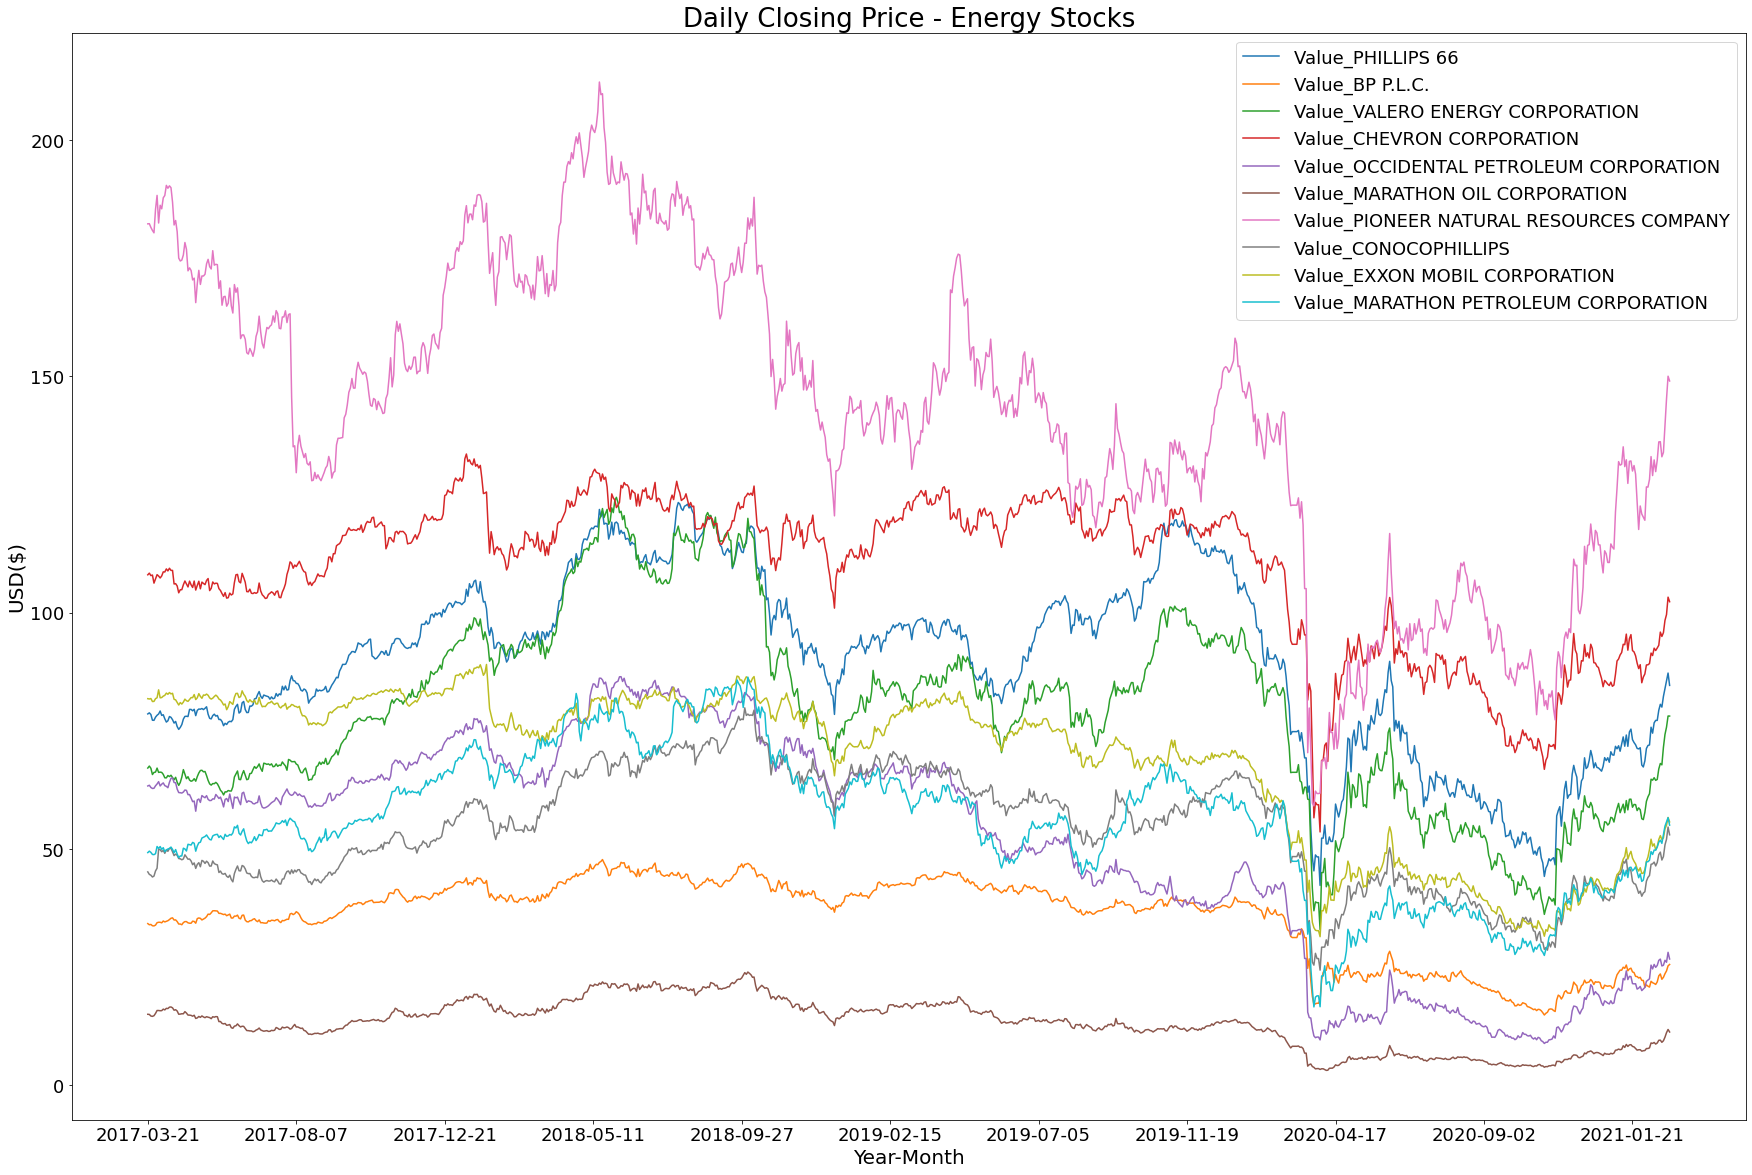

In [92]:
plot_series(nyse_indiv, list(nyse_indiv.columns), title='Daily Closing Price - Energy Stocks',
           xlab='Year-Month', ylab='USD($)')
plt.legend(nyse_indiv.columns, fontsize=18)
plt.savefig('all_closing.png', dpi=200, bbox_inches='tight');

In [94]:
nyse_indiv.to_csv('closing_price_by_company.csv')